In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pylab import rcParams

rcParams["figure.figsize"] = 20, 4
import warnings
warnings.filterwarnings("ignore")

In [39]:
url = "https://raw.githubusercontent.com/krishnaik06/Live-Time-Series/main/airline_passengers.csv"
df = pd.read_csv(url)

In [40]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [42]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [43]:
df[df["Thousands of Passengers"].isnull()][["Month", "Thousands of Passengers"]]

,Month,Thousands of Passengers
144,International airline passengers: monthly tota...,NaN


In [44]:
df.dropna(inplace=True)

In [45]:
df["Month"] = pd.to_datetime(df["Month"])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [47]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [48]:
df.columns

Index(['Month', 'Thousands of Passengers'], dtype='object')

In [49]:
df.rename(
    columns={
        "Month": "Date",
        "Thousands of Passengers": "Number of Passenger",
    },
    inplace=True,
)

In [50]:
df.head()

,Date,Number of Passenger
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [87]:
fig = px.line(x=df.index, y="Number of Passenger", data_frame=df, width=750, height=400)
fig.show()

In [77]:
df.set_index("Date", inplace=True)

Resampled Time Series Plot (6 Month and 4 Month)


In [97]:
df_resampled_6m = df.resample("6M").mean()
df_resampled_4m = df.resample("4M").mean()

In [114]:
fig = px.line(
    df,
    x=df.index,
    y="Number of Passenger",
    title="Original and Resampled Time Series",
)
fig.add_scatter(
    x=df_resampled_6m.index,
    y=df_resampled_6m["Number of Passenger"],
    mode="lines",
    name="Resampled 6M",
)
fig.add_scatter(
    x=df_resampled_4m.index,
    y=df_resampled_4m["Number of Passenger"],
    mode="lines",
    name="Resampled 4M",
)
fig.show()

Rolling Mean and Standard Deviation Plot


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number of Passenger  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [123]:
rolling_mean = df["Number of Passenger"].rolling(window=12).mean()
rolling_std = df["Number of Passenger"].rolling(window=12).std()

In [126]:
fig = px.line(
    df,
    x=df.index,
    y="Number of Passenger",
    title="Original and Rolling Time Series",
)
fig.add_scatter(x=df.index, y=rolling_mean, mode="lines", name="Mean Rolling")
fig.add_scatter(x=df.index, y=rolling_std, mode="lines", name="STD Rolling")
fig.show()

In [138]:
mul_decomposition = seasonal_decompose(
    df["Number of Passenger"], model="multiplicative", period=12
)

In [150]:
fig = make_subplots(
    rows=4,
    cols=1,
    shared_xaxes=True,
    subplot_titles=("Original Series", "Trend", "Seasonal", "Residual"),
)
fig.add_trace(
    go.Scatter(
        x=df.index, y=df["Number of Passenger"], mode="lines", name="Original Series"
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(x=df.index, y=mul_decomposition.trend, mode="lines", name="Trend"),
    row=2,
    col=1,
)
fig.add_trace(
    go.Scatter(x=df.index, y=mul_decomposition.seasonal, mode="lines", name="Seasonal"),
    row=3,
    col=1,
)
fig.add_trace(
    go.Scatter(x=df.index, y=mul_decomposition.resid, mode="markers", name="Residual"),
    row=4,
    col=1,
)
fig.update_layout(title="Time Series Decomposition", height=800)
fig.show()

In [167]:
df["Seasonal_Difference"] = df["Number of Passenger"] - df["Number of Passenger"].shift(
    12
)

In [168]:
fig = px.line(
    df,
    x=df.index,
    y="Number of Passenger",
    title="Original and Seasonal Differencing of  Time Series",
)
fig.add_scatter(
    x=df.index, y=df["Seasonal_Difference"], mode="lines", name="Seasonal Difference"
)
fig.show()

### Insights

#### Non-Stationary Data

- **Observation:** The passenger data fluctuates over time, indicating it is not stationary.
- **Implication:** Non-stationary data means that statistical properties like mean change over time, making it challenging to predict future values using simple statistical models that assume stationary.

#### Changing Mean and Standard Deviation

- **Observation:** The plots of the rolling mean and standard deviation show that both metrics change over time.
- **Implication:** This suggests that the average number of passengers and the variability in passenger numbers are not constant throughout the time period. This variability needs to be accounted for in any predictive modeling or analysis.

#### Seasonal Patterns

- **Observation:** There are peak points in the number of passengers during July to August.
  - **Reason:** This is likely due to seasonal factors such as summer vacations, holidays, or events that increase travel demand.
- **Observation:** Conversely, there are low points in passenger numbers during November to December.
  - **Reason:** This could be due to factors like colder weather, fewer holidays, or other external influences that reduce travel demand.
- **Implication:** Understanding these seasonal patterns can help in resource planning and management, such as staffing and scheduling for transportation services.

#### Time Series Decomposition

- **Observation:** Decomposing the time series into trend, seasonal, and residual components provides a clearer view of the underlying patterns.
  - **Trend Component:** Shows the long-term progression of passenger numbers, which could indicate growth or decline trends over the years.
  - **Seasonal Component:** Reveals regular patterns that repeat over time, crucial for identifying predictable variations.
  - **Residual Component:** Captures the noise or irregular fluctuations in the data, indicating randomness or unexpected events.
- **Implication:** Each component helps in understanding different aspects of the data:
  - **Trend Analysis:** Useful for identifying long-term growth or decline, aiding in strategic planning.
  - **Seasonal Analysis:** Helps in anticipating regular fluctuations, useful for operational planning.
  - **Residual Analysis:** Identifies anomalies or unexpected changes, which can be investigated for potential causes.

#### Additional Insights

- **Long-Term Growth:** If the trend component shows a consistent increase, it may indicate a growing demand for travel over time.
- **Impact of External Events:** Significant deviations in the residual component might be correlated with external events such as economic shifts, policy changes, or extraordinary circumstances (e.g., pandemics, natural disasters).
- **Modeling and Forecasting:** Understanding the non-stationary nature and decomposition of the time series can inform the choice of appropriate modeling techniques, such (Seasonal ARIMA) models that can handle seasonality and trends.


In [166]:
result = adfuller(df["Number of Passenger"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 0.8153688792060457
p-value: 0.991880243437641


Since the ADF statistic (0.8153688792060457) is greater than all the critical values, and the p-value (0.991880243437641) is much higher than 0.05, we fail to reject the null hypothesis of the presence of a unit root. This means that the time series is non-stationary.


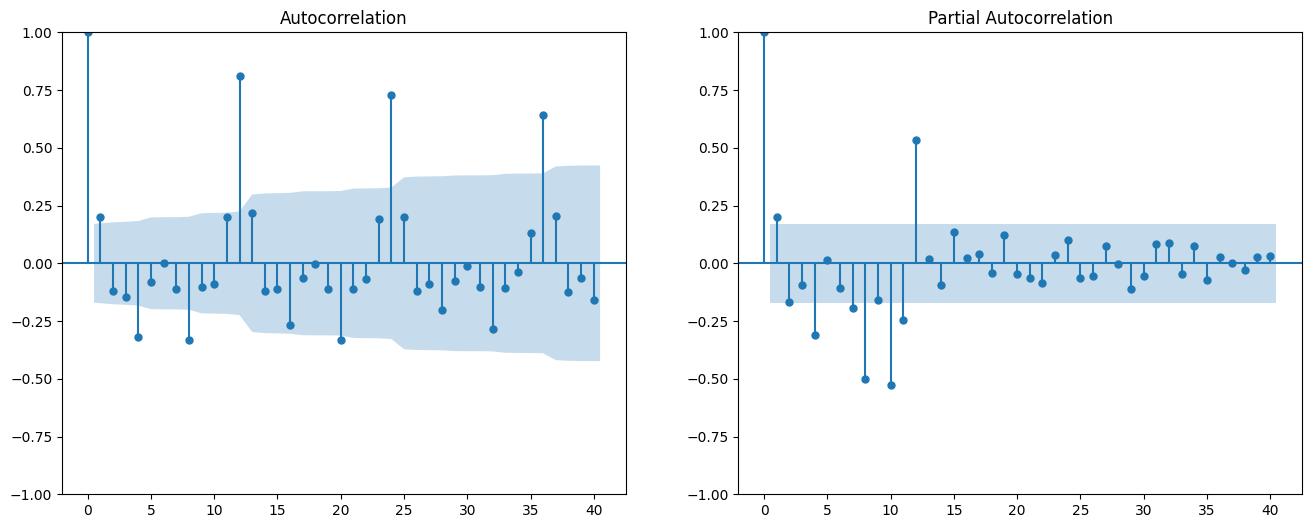

In [175]:
df["Log_Passenger"] = np.log(df["Number of Passenger"])
df["Log_Passenger_Diff"] = df["Log_Passenger"] - df["Log_Passenger"].shift(1)
df_transformed = df.dropna()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df_transformed["Log_Passenger_Diff"], lags=40, ax=axes[0])
plot_pacf(df_transformed["Log_Passenger_Diff"], lags=40, ax=axes[1])
plt.show()

Proposed ARIMA Model Parameters

- Differencing Order (d): Already determined to be 1 (first-order differencing).
- Autoregressive Order (p): Based on PACF, we choose p=1.
- Moving Average Order (q): Based on ACF, we choose q=1.


## ARIMA


In [192]:
model = ARIMA(df_transformed["Log_Passenger_Diff"], order=(1, 1, 1))
model_fit = model.fit()
df_transformed["Forecast"] = model_fit.fittedvalues

In [187]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=df_transformed.index,
        y=df_transformed["Log_Passenger_Diff"],
        mode="lines",
        name="Actual",
    )
)
fig.add_trace(
    go.Scatter(
        x=df_transformed.index,
        y=df_transformed["Forecast"],
        mode="lines",
        name="Fitted",
        line=dict(color="red"),
    )
)
fig.update_layout(
    title="Actual vs Fitted Values",
    xaxis_title="Date",
    yaxis_title="Log Differenced Passenger Numbers",
)
fig.show()

In [188]:
model = SARIMAX(df["Log_Passenger_Diff"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()
df["Forecast"] = model_fit.fittedvalues

In [191]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df.index, y=df["Log_Passenger_Diff"], mode="lines", name="Actual")
)
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df["Forecast"],
        mode="lines",
        name="Fitted",
        line=dict(color="red"),
    )
)
fig.update_layout(
    title="Actual vs Fitted Values (SARIMA)",
    xaxis_title="Date",
    yaxis_title="Log Passenger Numbers",
)
fig.show()